# Pymaceuticals Inc.
---

### Analysis

###### 1. Total of 248 mice were observed. Data included Mouse ID, Timepoint, Tumor Volume, Drug Regimen, Sex, Age, Weight.
###### 2. There were total of 958 male mice and 922 male mice. 51% of total population was male and 49% of total population was female.
###### 3. Total of 10 drugs were tested. Most mice were tested with Capomulin and Ramicane, where the least numbers of mice were tested with Propriva. From looking at the mean of the Tumor Volume, Capomulin  and Ramicane are the most effective treatment.
###### 4. There was a correlation oberrved between average mouse weight and average tumor volume. There is a strong correlation that when the weight of the mouse increases the tumor volume also increases. The correlation between the mouse eight and average tumor volume is 0.84.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Re-arraged the columns in the dataframe
combined_dataset = combined_dataset.reindex(columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                                                      'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
# Display the data table for preview
combined_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
number_of_mice = combined_dataset['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset.loc[combined_dataset.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_dataset.loc[combined_dataset['Mouse ID'] == 'g989', :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.
clean_dataset = combined_dataset[combined_dataset['Mouse ID'].isin(duplicate_mice)==False]
clean_dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_2 = clean_dataset['Mouse ID'].nunique()
number_of_mice_2

248

## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_group = clean_dataset.groupby('Drug Regimen')
mean_tumor_volume = drug_regimen_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regimen_group['Tumor Volume (mm3)'].median()
variance_tumor_volume = drug_regimen_group['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = drug_regimen_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regimen_group['Tumor Volume (mm3)'].sem()

# Print above results
regimen_summary = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': median_tumor_volume,
                               'Tumor Volume Variance': variance_tumor_volume, 'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                               'Tumor Volume Std. Err.': sem_tumor_volume})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line

regimen_summary_aggregation = clean_dataset.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Number of Mice Tested'>

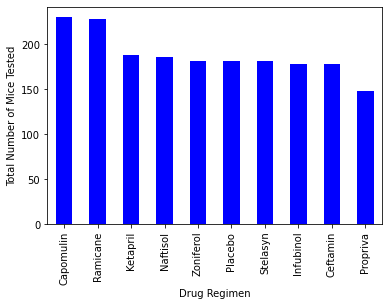

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_count = clean_dataset['Drug Regimen'].value_counts()
regimen_bar_graph = regimen_count.plot.bar(color = 'blue')
regimen_bar_graph.set_xlabel('Drug Regimen')
regimen_bar_graph.set_ylabel('Total Number of Mice Tested')
regimen_bar_graph

Text(0, 0.5, 'Total Number of Mice Tested')

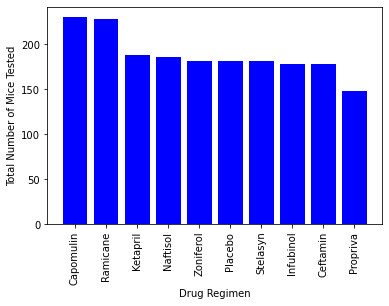

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Creating axis 
x_axis = np.arange(len(regimen_count))
y_axis = regimen_count

# Creating ticks
tick = list(regimen_count.index.values)
tick_locations = [value for value in x_axis]

# Creating graph
plt.bar(x_axis, y_axis, color = 'blue')
plt.xticks(tick_locations, tick, rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice Tested')

Male      958
Female    922
Name: Sex, dtype: int64

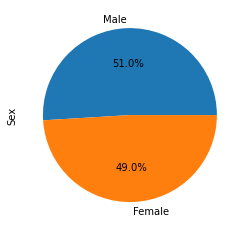

In [11]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

gender_dataset = clean_dataset['Sex'].value_counts()

# Creating a pie chart
gender_pie_chart = gender_dataset.plot(kind = 'pie', autopct = '%1.1f%%');
gender_pie_chart
gender_dataset

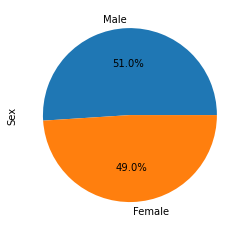

In [12]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.

gender_labels = ['Male', 'Female']
gender_sizes = [50, 48]
plt.pie(gender_sizes, labels = gender_labels, autopct = '%1.1f%%')
plt.ylabel('Sex');

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

mouse_timepoint = clean_dataset.groupby(['Mouse ID'])['Timepoint'].max()
mouse_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_dataset = pd.merge(clean_dataset, mouse_timepoint, how = 'inner', on = ['Mouse ID', 'Timepoint'])
#timepoint_dataset


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# More information should be provided about this part since it is confusing and difficult.
# Part of this is similar to Day3 but **the suggestions make more sense** if you know you are doing
# this so so you have 4 lists contained inside a list bc this is used to generate the boxplot in the next cell.

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    regimen_vol = timepoint_dataset.loc[timepoint_dataset['Drug Regimen'] == treatment]
    tumor_vol = regimen_vol['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)  
    
#tumor_vol_data

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile_1 = tumor_vol_data[0].quantile([.25, .5, .75])
lowerq_1 = quartile_1[0.25]
upperq_1 = quartile_1[0.75]
iqr_1 = upperq_1 - lowerq_1

quartile_2 = tumor_vol_data[1].quantile([.25, .5, .75])
lowerq_2 = quartile_2[0.25]
upperq_2 = quartile_2[0.75]
iqr_2 = upperq_2 - lowerq_2

quartile_3 = tumor_vol_data[2].quantile([.25, .5, .75])
lowerq_3 = quartile_3[0.25]
upperq_3 = quartile_3[0.75]
iqr_3 = upperq_3 - lowerq_3

quartile_4 = tumor_vol_data[3].quantile([.25, .5, .75])
lowerq_4 = quartile_4[0.25]
upperq_4 = quartile_4[0.75]
iqr_4 = upperq_4 - lowerq_4

# bounds
lower_bound_1 = lowerq_1 - (1.5 * iqr_1)
upper_bound_1 = upperq_1 + (1.5 * iqr_1)

lower_bound_2 = lowerq_2 - (1.5 * iqr_2)
upper_bound_2 = upperq_2 + (1.5 * iqr_2)

lower_bound_3 = lowerq_3 - (1.5 * iqr_3)
upper_bound_3 = upperq_3 + (1.5 * iqr_3)

lower_bound_4 = lowerq_4 - (1.5 * iqr_4)
upper_bound_4 = upperq_4 + (1.5 * iqr_4)

# Print results of each drugs outliers - results printed don't need to look pretty.  See below.    
# Note:  in the output below:  '31   36.32346' is series index 31 and value 36.32346.  There is only one outlier.
print(f'{treatments[0]} potential outliers: Below {lower_bound_1} and above {upper_bound_1}')
print(f'{treatments[1]} potential outliers: Below {lower_bound_2} and above {upper_bound_2}')
print(f'{treatments[2]} potential outliers: Below {lower_bound_3} and above {upper_bound_3}')
print(f'{treatments[3]} potential outliers: Below {lower_bound_4} and above {upper_bound_4}')

Capomulin potential outliers: Below 20.70456164999999 and above 51.83201549
Ramicane potential outliers: Below 17.912664470000003 and above 54.30681135
Infubinol potential outliers: Below 36.83290494999999 and above 82.74144559000001
Ceftamin potential outliers: Below 25.355449580000002 and above 87.66645829999999


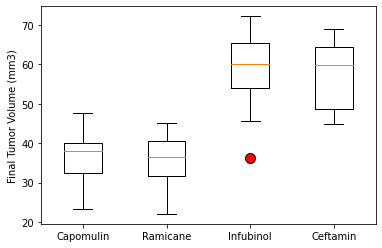

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 10)
ax.boxplot(tumor_vol_data, labels = treatments, flierprops = flierprops);
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [18]:
# List of mice treated with Capomulin treatement
capomulin_mice = clean_dataset.loc[clean_dataset['Drug Regimen'] == 'Capomulin']
capomulin_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

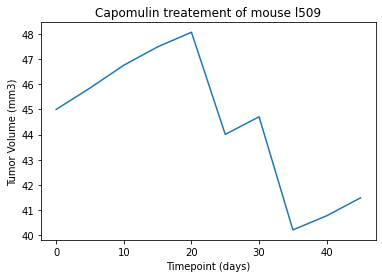

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_l509 = clean_dataset.loc[clean_dataset['Mouse ID'] == 'l509']
# mouse_l509

# Creating axis
mouse_l509_x_axis = mouse_l509['Timepoint']
mouse_l509_y_axis = mouse_l509['Tumor Volume (mm3)']

# Generating Line plot
plt.plot(mouse_l509_x_axis, mouse_l509_y_axis)
plt.title('Capomulin treatement of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

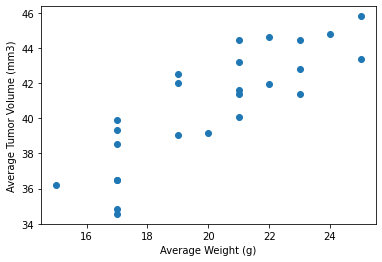

In [20]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

capomulin_group = capomulin_mice.groupby(['Mouse ID']).mean()
# capomulin_group

plt.scatter(capomulin_group['Weight (g)'], capomulin_group['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


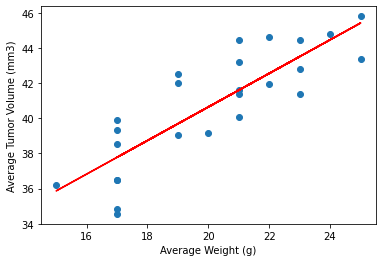

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Creating axis
x_values = capomulin_group['Weight (g)']
y_values = capomulin_group['Tumor Volume (mm3)']

# Correlation Coefficient and Linear Regression
correlation = st.pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Printing correlation coefficient between mouse weight and average tumor volume
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

# Creating scatter plot
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color = 'red')
plt.show()